# Creating phase diagram using trained model

In [1]:
import torch
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras
# import tensorflow as tf
import torch

from pathlib import Path

import matplotlib.pyplot as plt


/home/rothals/dev/school/diploma_thesis/dev/venv/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:

model = keras.models.load_model("saved_models/model5-2025-02-19_133421-default.keras", compile=False)


AttributeError: can't set attribute 'input_shape'

In [3]:
dataset = np.load("data/train/datasetMC.npz")

In [4]:

data_tensor = torch.Tensor(dataset["data"])

predictions = model.predict(data_tensor)

prediction_dataset = {
    "data": predictions,
    "values": dataset["values"]
}

  9/308 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step 

/home/rothals/dev/school/diploma_thesis/dev/venv/lib64/python3.10/site-packages/keras/src/backend/torch/nn.py:439: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  outputs = tnn.conv2d(


308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


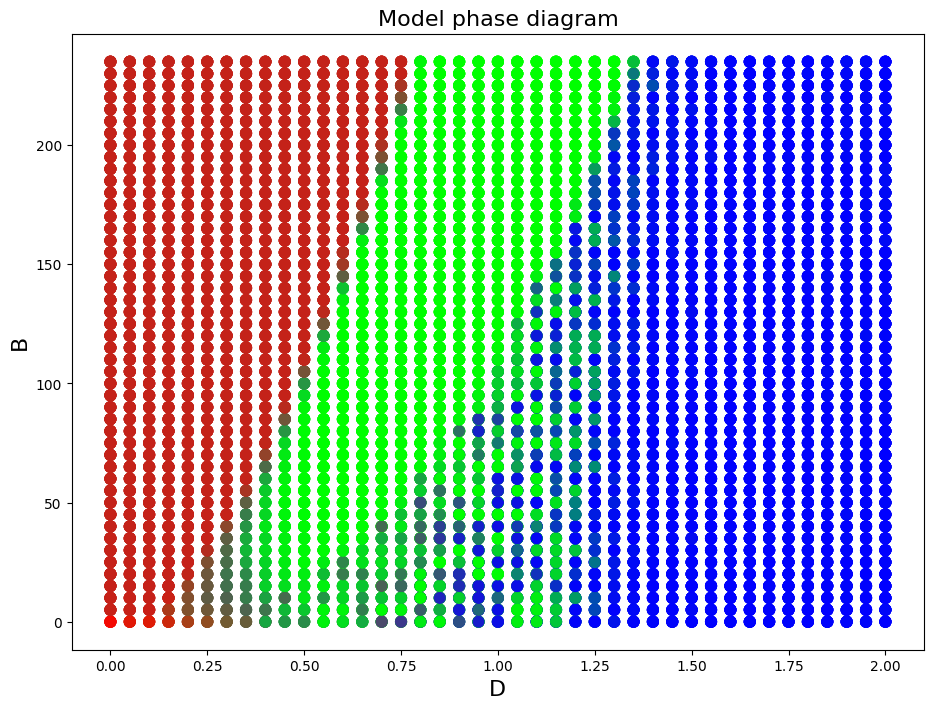

In [6]:
fig, ax = plt.subplots(figsize=(11,8))

r = prediction_dataset["data"][:, 0]
b = prediction_dataset["data"][:, 1]
g = prediction_dataset["data"][:, 2]

colors = np.stack([r, b, g], axis=1)

ax.scatter(*prediction_dataset["values"].T, c=(colors), marker="o", s=60)

ax.set_title("Model phase diagram", size=16)
ax.set_xlabel("D", size=16)
ax.set_ylabel("B", size=16)

plt.show()

In [12]:
data_tensor[0].unsqueeze(0).shape

torch.Size([1, 200, 200])

In [22]:
model.set_mc_inference(True)
# model.predict(data_tensor[321].unsqueeze(0))

TypeError: ModelBase.set_mc_inference() takes 1 positional argument but 2 were given